<a href="https://colab.research.google.com/github/priscilaek/priscilaek/blob/main/Pris_ProyectoM6_Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre: Priscila Elías K.

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador. 

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados. 

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- | 
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


##Nombre: Priscila Elías Kana

##Libraries (Importamos las librerias necesarias)

In [37]:
# Primero debemos instalar NLTK
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#Para la Gráfica
import matplotlib.pyplot as plt
#Para la nube de palabras
from wordcloud import WordCloud 
from nltk import FreqDist
#Para la vectorización
from sklearn.feature_extraction.text import CountVectorizer
#Para el entrenamiento 1
from sklearn.linear_model import LogisticRegression
#Para la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Data Source (Se reduce el tamaño de la data)

In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
CSV_PATH = "/content/drive/MyDrive/UCamp/training.1600000.processed.noemoticon.csv.zip"

In [41]:
df = pd.read_csv(CSV_PATH,encoding = "CP1252",header=None)

In [42]:
df = df.iloc[:,[5,0]]
df.columns = ['Text','Class']
df = df.sample(12000)
df.reset_index(drop=True,inplace=True)
df.tail(10)

,Text,Class
11990,I Hate when shows do that to you they dont sho...,0
11991,just got home from ABGs party. it was pretty t...,4
11992,@bios no compromise had been made in the secur...,4
11993,@Rayuen yeah a couple (like randall munroe of ...,0
11994,@scottrmcgrew Well thank you for following first,4
11995,@Mikesleigh haha yes !!! WHY WONT IT STOP RAI...,0
11996,2dayis last day of garage sale.Am whipped but ...,4
11997,"@BlokesLib Anyway, I don't have anything of mu...",4
11998,@Maxwell_Poops woah. I live in north Philly. ...,0
11999,just got done sending a thank you email to Aus...,4


##Limpieza de Datos

##Data preprocessing (Se realiza la Limpieza de los datos)

- Quitar valores nulos
- Remover los URL de los tuits
- Remover números
- Quitar signos de puntuación
- Eliminar las palabras de parada

In [43]:
#Reemplazar valores nulos con NaN y Eliminar filas con valor NaN
df = df.replace(r'^\s$', np.nan,regex=True)
df = df.dropna()

In [44]:
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [45]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    #Remove urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #Remove numbers
    text = re.sub('\w*\d\w*', '', text)   
    #Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [46]:
df["Text"] = df["Text"].apply(clean_text)

In [47]:
df.head(10)

,Text,Class
0,less than hours to go less than hours to go...,4
1,theroughguide i am really feeling for you yo...,0
2,lockbox ec year is nicer and you can stay up ...,4
3,up early with no one to spoon with,0
4,alexandrastack no its for being a nerd ...,0
5,day off today as its my bday starting with a ...,0
6,simoncurtis almost looks like a great ad for ...,4
7,johnackley clean me,0
8,thunderchunkyuk i have a few suggestions,4
9,myinnerbitch good friday morning have a gr...,4


In [48]:
#Remover stop words
def remove_stopwords(text):
  text = set(stopwords.words('english')) 
  return text

In [49]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ('Text')]))

In [50]:
df.head(10)

,Text,Class
0,less than hours to go less than hours to go si...,4
1,theroughguide i am really feeling for you your...,0
2,lockbox ec year is nicer and you can stay up t...,4
3,up early with no one to spoon with,0
4,alexandrastack no its for being a nerd if were...,0
5,day off today as its my bday starting with a c...,0
6,simoncurtis almost looks like a great ad for a...,4
7,johnackley clean me,0
8,thunderchunkyuk i have a few suggestions,4
9,myinnerbitch good friday morning have a great day,4


##Análisis Inicial

##Generación de gráfica y una nube de palabras (Por el sentimiento Target)

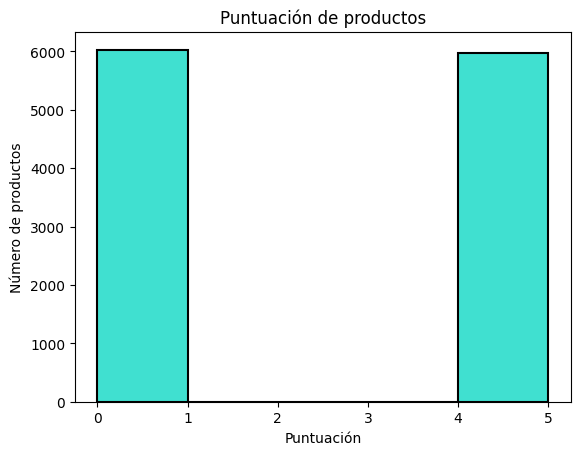

In [51]:
# Generamos un histograma con las puntuaciones de los productos
plt.hist(df['Class'], color="turquoise",ec="black", lw=1.5, bins=[0,1,2,3,4,5])
plt.title("Puntuación de productos")
plt.xlabel("Puntuación")
plt.ylabel("Número de productos")
plt.show()

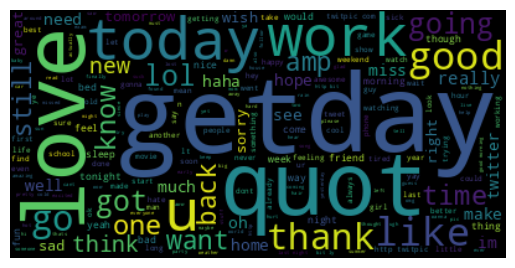

In [52]:
#Se crea una lista de palabras de parada
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
#Se une el texto de todas las críticas en una cadena y se crea una nube de palabras usando esta cadena. 
textt = " ".join(review for review in df.Text)
#Se establecen algunas palabras de parada adicionales para eliminarlas de la nube de palabras. 
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

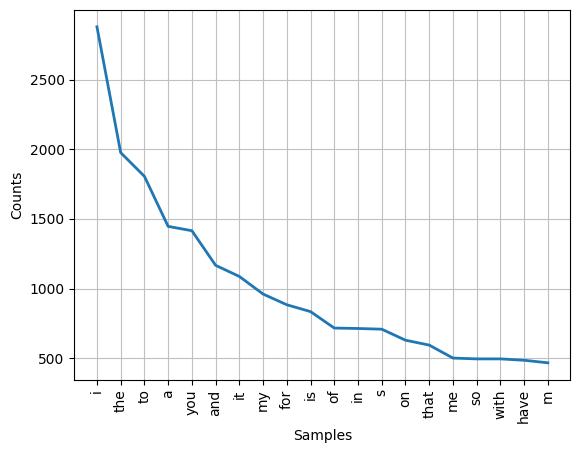

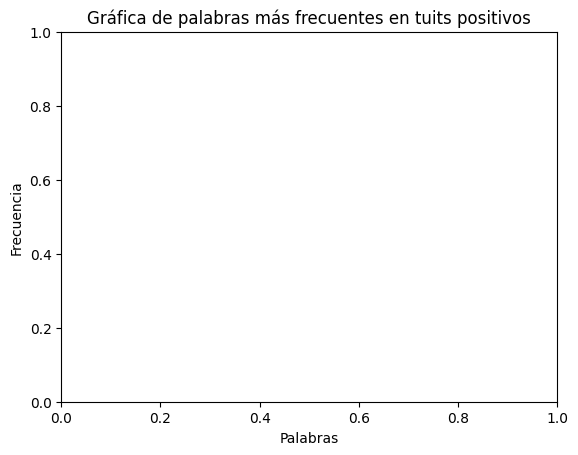

In [53]:
# Generar una gráfica de acuerdo con el target del tuit Positivo
df_positive = df[df['Class'] == 4]
df_positive['Text'].str.split().apply(FreqDist).sum().plot(20, cumulative=False)
plt.title('Gráfica de palabras más frecuentes en tuits positivos')
plt.ylabel('Frecuencia')
plt.xlabel('Palabras')
plt.show()

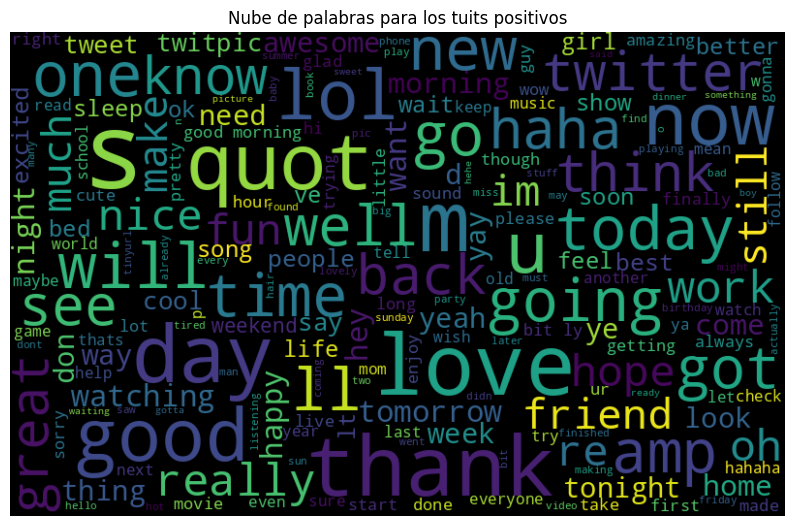

In [54]:
#Se genera una nube de palabras para los tuits positivos
text_positive = df_positive['Text'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=500, max_font_size=110).generate(text_positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras para los tuits positivos')
plt.show()

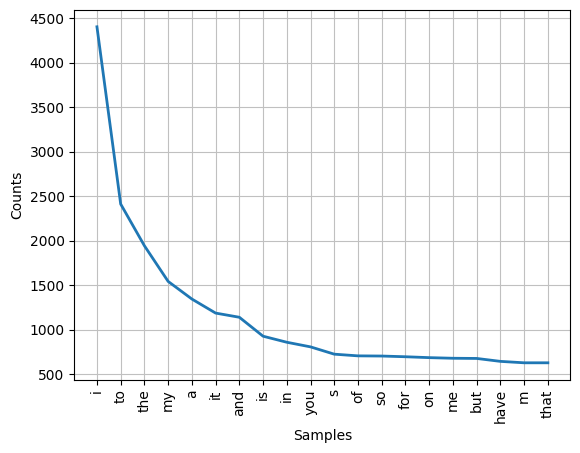

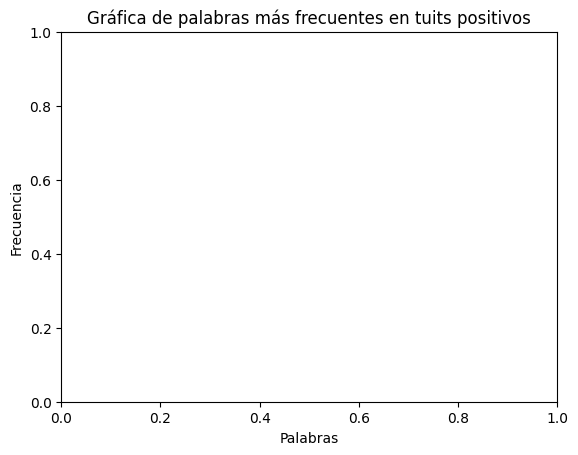

In [55]:
# Generar una gráfica de acuerdo con el target del tuit negativos
df_negative = df[df['Class'] == 0]
df_negative['Text'].str.split().apply(FreqDist).sum().plot(20, cumulative=False)
plt.title('Gráfica de palabras más frecuentes en tuits positivos')
plt.ylabel('Frecuencia')
plt.xlabel('Palabras')
plt.show()

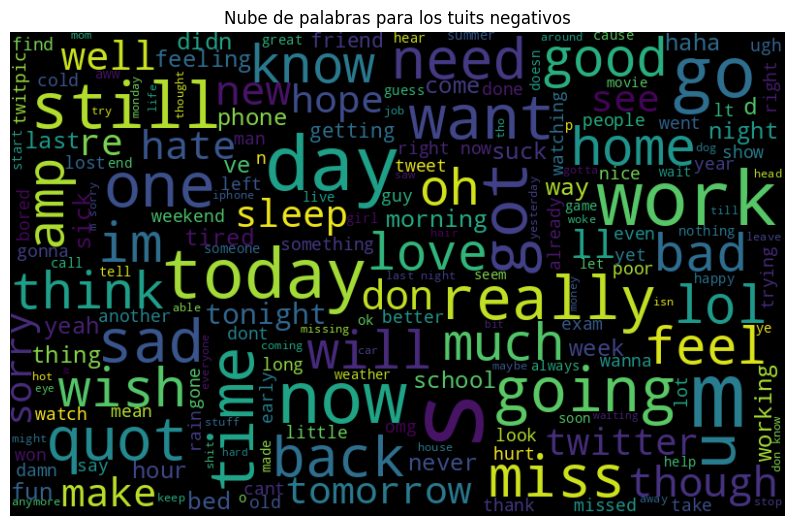

In [56]:
# Generar una nube de palabras para los tuits negativos
df_negative = df[df['Class'] == 0]
text_negative = df_negative['Text'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=500, max_font_size=110).generate(text_negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras para los tuits negativos')
plt.show()

##Vectorización

##Realizar Vectorización (Se convierte una matriz de documentos de texto en una matriz de números, la que se utilizará para entrenar el modelo)

In [57]:
dfNew = df[['Text','Class']]
dfNew.head()

,Text,Class
0,less than hours to go less than hours to go si...,4
1,theroughguide i am really feeling for you your...,0
2,lockbox ec year is nicer and you can stay up t...,4
3,up early with no one to spoon with,0
4,alexandrastack no its for being a nerd if were...,0


In [58]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

El conjunto de entrenamiento se crea con los valores de random_number menores o iguales a 0.8 y el conjunto de prueba se crea con los valores mayores a 0.8. Esto se hace para permitir que el modelo se entrene con el conjunto de entrenamiento y se evalúe con el conjunto de prueba.

In [59]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Text'])
test_matrix = vectorizer.transform(test['Text'])

El token_pattern proporcionado a la instancia de CountVectorizer se usa para especificar cómo se deben dividir los documentos en palabras.
La matriz de entrenamiento se usa para entrenar el modelo y se construye usando el método fit_transform, que transforma los documentos a la matriz de características. 
La matriz de prueba se construye usando el método transform, que transforma los documentos a la misma matriz de características para que el modelo pueda evaluar los documentos de prueba. 

In [60]:
train_matrix

<9535x16687 sparse matrix of type '<class 'numpy.int64'>'
	with 120177 stored elements in Compressed Sparse Row format>

In [61]:
test_matrix

<2465x16687 sparse matrix of type '<class 'numpy.int64'>'
	with 27761 stored elements in Compressed Sparse Row format>

##Entrenamiento 1

##Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.

Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

##Regresión Logística

In [62]:
#Se crea una instancia del modelo de regresión logística para predecir la clase.
lr = LogisticRegression(max_iter=1000)

In [63]:
#Asignar conjuntos de entrenamiento y prueba
X_train = train_matrix
X_test = test_matrix
y_train = train['Class']
y_test = test['Class']

In [64]:
#se entrena usando los datos de entrenamiento para encontrar los parámetros óptimos que mejor predigan la clase de cada documento.
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
#Hacemos algunas predicciones usando el conjunto de pruebas
predictions = lr.predict(X_test)
print(X_test)

  (0, 5748)	2
  (0, 6616)	2
  (0, 8312)	2
  (0, 14439)	2
  (0, 14782)	2
  (0, 15704)	1
  (1, 441)	1
  (1, 2256)	1
  (1, 4965)	1
  (1, 5233)	1
  (1, 6734)	1
  (1, 11232)	1
  (1, 11821)	1
  (1, 16526)	1
  (1, 16535)	1
  (2, 0)	1
  (2, 127)	1
  (2, 403)	1
  (2, 690)	1
  (2, 5233)	1
  (2, 5903)	1
  (2, 8374)	1
  (2, 8566)	1
  (3, 967)	1
  (3, 2094)	1
  :	:
  (2463, 740)	1
  (2463, 1068)	1
  (2463, 1300)	1
  (2463, 2094)	1
  (2463, 6057)	1
  (2463, 6904)	1
  (2463, 8778)	1
  (2463, 8810)	1
  (2463, 10136)	1
  (2463, 10206)	1
  (2463, 10323)	1
  (2463, 10573)	1
  (2463, 11792)	1
  (2463, 12779)	1
  (2463, 14463)	1
  (2463, 14782)	1
  (2463, 15488)	1
  (2463, 15874)	1
  (2464, 6068)	1
  (2464, 7141)	1
  (2464, 11705)	1
  (2464, 13801)	1
  (2464, 16047)	1
  (2464, 16188)	1
  (2464, 16483)	1


In [66]:
#Esta matriz se usa para ver cuántas predicciones se hicieron correctamente y cuántas se hicieron incorrectamente. 
#Esto ayuda a evaluar el desempeño del modelo.
new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions,y_test)
cf_matrix

array([[920, 287],
       [339, 919]])

El desempeño de la matriz de confusión anterior es de una precisión del 76,2%, ya que la suma de los valores correctamente clasificados es de 1839 (920 + 919), que es un 76,2% del total de 2436 instancias. 

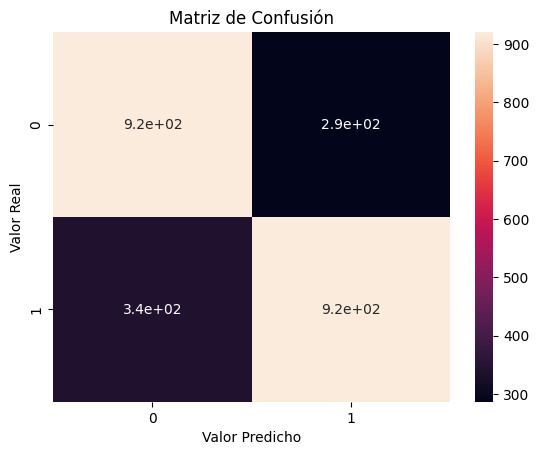

In [67]:
sns.heatmap(cf_matrix, annot=True)
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [68]:
#Evaluación del desempeño
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1207
           4       0.76      0.73      0.75      1258

    accuracy                           0.75      2465
   macro avg       0.75      0.75      0.75      2465
weighted avg       0.75      0.75      0.75      2465



La precisión es una métrica de rendimiento utilizada para evaluar la exactitud de un modelo de clasificación. Esta tabla muestra los resultados de la precisión, el recordatorio, el puntaje F1 y el soporte para cada clase de la matriz de confusión anterior. La precisión para la clase 0 es del 73%, mientras que la precisión para la clase 4 es del 76%. El recordatorio para la clase 0 es del 76%, mientras que el recordatorio para la clase 4 es del 73%. El puntaje F1 para ambas clases es de 0,75. La precisión promedio ponderada para todas las clases es de 0,75.

Realizamos una prueba con un texto ingresado:

In [69]:
review_test = "The product was very excelent"

In [70]:
# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr.predict(review_convert)
prediction_test

array([4])

In [71]:
review_test2 = "I hate this product"

In [72]:
review_convert = vectorizer.transform([review_test2])
prediction_test2 = lr.predict(review_convert)
prediction_test2

array([0])

In [87]:
review_test3 = "is going not bad"

In [86]:
review_convert = vectorizer.transform([review_test3])
prediction_test3 = lr.predict(review_convert)
prediction_test3

array([4])

Se transforma la reseña a un vector usando el vectorizador. Luego, se predice con el modelo de regresión logística. Finalmente, el resultado de la predicción se almacena en la variable "prediction_test"

##Entrenamiento 2

##Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y escribir las conclusiones de tus resultados.

Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

## Naive Bayes

In [94]:
print('train_matrix shape: ', train_matrix.shape)
print('test_matrix shape: ', test_matrix.shape)

train_matrix shape:  (9535, 16687)
test_matrix shape:  (2465, 16687)


In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#Inicializar el modelo
clf = MultinomialNB()
#Ajustar el modelo con los datos de entrenamiento
clf.fit(train_matrix, y_train)
#Realizar predicciones con los datos de prueba
y_pred = clf.predict(test_matrix) # Predicciones del modelo
#Evaluar el modelo
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.7496957403651116


In [96]:
#Esta matriz se usa para ver cuántas predicciones se hicieron correctamente y cuántas se hicieron incorrectamente. 
#Esto ayuda a evaluar el desempeño del modelo.
new = np.asarray(y_test)
cf_matrixB = confusion_matrix(y_pred,y_test)
cf_matrixB

array([[1023,  381],
       [ 236,  825]])

El modelo clasificó correctamente 1023 casos positivos y 825 casos negativos, mientras que clasificó incorrectamente 381 casos como positivos y 236 casos como negativos. 

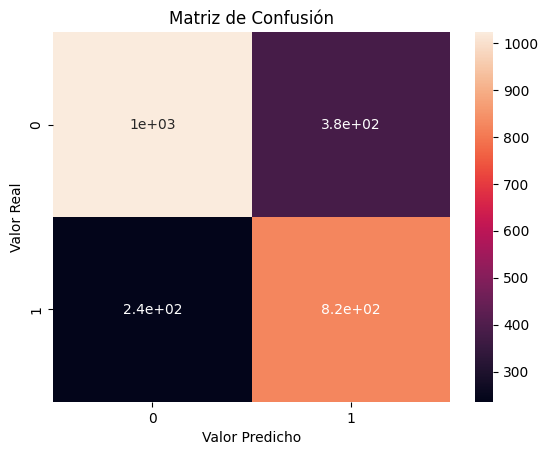

In [97]:
sns.heatmap(cf_matrixB, annot=True)
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [98]:
#Evaluación del desempeño
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1404
           4       0.68      0.78      0.73      1061

    accuracy                           0.75      2465
   macro avg       0.75      0.75      0.75      2465
weighted avg       0.76      0.75      0.75      2465



Para la clase 0, el modelo tiene una precisión del 81%. 
Para la clase 4, el modelo tiene una precisión del 68%. 
La precisión promedio es del 75%, lo que significa que el modelo clasifica correctamente el 75% de todos los casos.
La precisión promedio ponderada es del 76%, lo que significa que el modelo clasifica correctamente el 76% de todos los casos, y da más peso a las clases con un mayor número de ejemplos.


In [108]:
review_test = "I love this product"

In [109]:
review_convert = vectorizer.transform([review_test])
prediction_test = clf.predict(review_convert)
prediction_test

array([4])

In [110]:
review_test2 = "I hate this product"

In [111]:
review_convert = vectorizer.transform([review_test2])
prediction_test2 = clf.predict(review_convert)
prediction_test2

array([0])

In [112]:
review_test3 = "is going not bad"

In [113]:
review_convert = vectorizer.transform([review_test3])
prediction_test3 = clf.predict(review_convert)
prediction_test3

array([0])

Se encuentra que para el comentario "is going not bad" hay una diferencia entre el clasificador del modelo de regresión logística que clasifica como 4 debido a su porcentaje de precisión (76%) que es mayor respecto al de Bayes (68%).